### `Simple Linear Regression`

**Dataset Description**

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay.

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

From this information, we frame the problem:

1. Problem Statements: How might we predict tips that will be received by food servers so we can minimize unfair treatment?
2. Data:
3. Label: Tips
4. Features: Total Bill
5. ML Objective: Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.
6. Action: Make food servers allocation
7. Value: The sake of staff morale

#### `Initial Setup`

In [1]:
import numpy as np  
import pandas as pd
import statsmodels.api as sm 
import seaborn as sns  
import matplotlib.pyplot as plt

#### `Data Understanding`

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
tips = sns.load_dataset("tips")
print(f'jumlah kolom dan baris{tips.shape}')

jumlah kolom dan baris(244, 7)


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


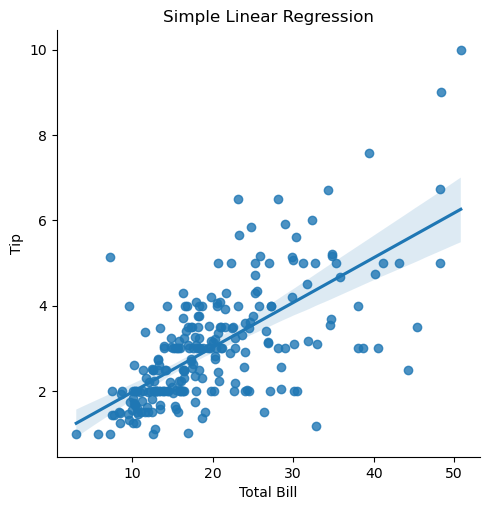

In [5]:
sns.lmplot(x="total_bill", y="tip", data=tips)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Simple Linear Regression")
plt.show()

**Initial Assesment**

To understand our data, we will show:

`descriptive statistic`

In [6]:
#limitation : diluar rentang 3.07 - 50.81, ga bisa dipredict
descriptive_stats = tips[['total_bill', 'tip']].describe()
descriptive_stats

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


`graphical summary`

c:\Users\Fiki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


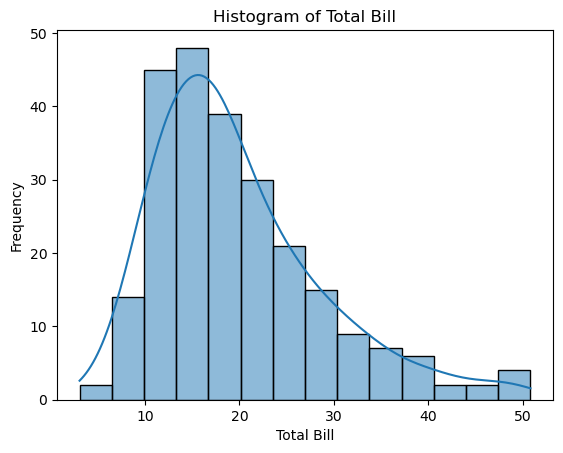

In [7]:
#Menggunakan Histogram
sns.histplot(tips['total_bill'], kde=True)
plt.title('Histogram of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

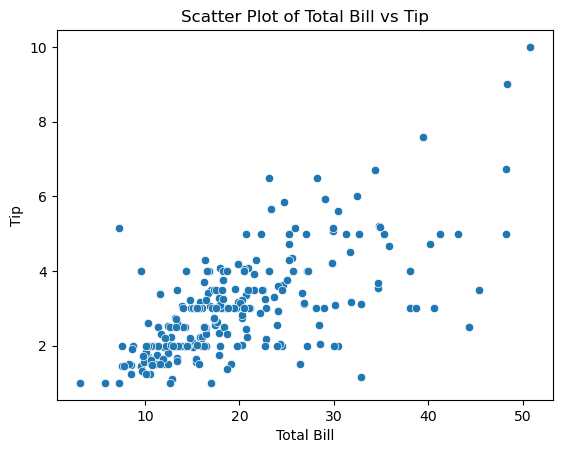

In [8]:
#Menggunakan Scatter Plot untuk menunjukkan hubungan antara total bill dan tip.
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

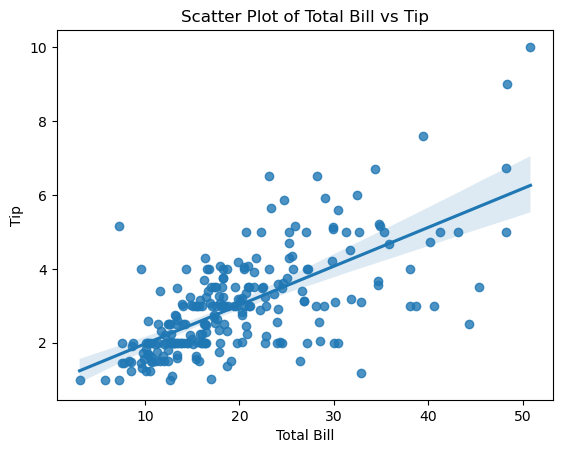

In [9]:
sns.regplot(x='total_bill', y='tip', data=tips)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

`correlation`

In [10]:
correlation = tips[['total_bill', 'tip']].corr(method='spearman')
correlation

,total_bill,tip
total_bill,1.000000,0.678968
tip,0.678968,1.000000


#### `Data Preparation`

We start to apply simple linear regression to the dataset:

- y: Tips
- X: Total Bill

In [11]:
y = tips['tip']
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [12]:
#X pake dataframe karna biasanya multiple feature, pake [[]]
X = tips[['total_bill']]
X

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [13]:
#ambil koefisien/konstanta B0 menggunakan sm
X = sm.add_constant(tips[['total_bill']])
X

,const,total_bill
0,1.0,16.99
1,1.0,10.34
2,1.0,21.01
3,1.0,23.68
4,1.0,24.59
...,...,...
239,1.0,29.03
240,1.0,27.18
241,1.0,22.67
242,1.0,17.82


#### `Modeling`

In [14]:
#Ordinary List Square (OLS), agar minimum ERROR nya
linreg = sm.OLS(y,X) 
# Output <statsmodels.regression.linear_model.OLS at 0x20525dd3710>
result = linreg.fit() #untuk melatih model pada data pelatihan, sama kaya machine learning

In [15]:
print(result.summary())

# dari gambar dibawah dapat disimpulkan B0 nya adalah 0.9203
# dan B1 nya adalah 0.1050

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           6.69e-34
Time:                        19:04:29   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

**Model Interpretation**

Equation:
$$\text{y} = \beta_{0} + \beta_{1} * X$$
$$\text{tip} = 0.9203 + 0.1050 * {total bill}$$

F-Test:
- 'H0' : $\beta_{1}=0$ Total Bill tidak berpengaruh signifikan terhadap tips
- 'H1' : $\beta_{1}!=0$ Total Bill berpengaruh signifikan terhadap tips(Minimal ada 1 variable yang berpengarh signifikan terhadap target)
- $\alpha = 0.05$
- Prob(F-statiscic) : 6.69e-34 (p-value)
- P-value < 0.05 : Reject H0
- Artinya kita punya cukup bukti bahwa total bill mempengaruhi secara signifikan terhadap tip yang diberikan

Partial Test:
- 'H0' : $\beta_{0}=0$ Model tidak membutuhkan intercept
- 'H1' : $\beta_{0}!=0$ Model membutuhkan intercept
- $\alpha = 0.05$
- Prob(t-statiscic) : 0.000 (p-value)
- P-value < 0.05 : Reject H0
- Artinya kita punya cukup bukti bahwa model membutuhkan intercept
</br></br>
- 'H0' : $\beta_{1}=0$ Total bill tidak berpengaruh signifikan terhadap tips
- 'H1' : $\beta_{1}!=0$ Total bill berpengaruh signifikan terhadap tips
- $\alpha = 0.05$
- Prob(t-statiscic) : 0.000 (p-value)
- P-value < 0.05 : Reject H0
- Artinya kita punya cukup bukti bahwa total bill berpengaruh secara signifikan terhadap tip

Parameter Estimate:
- $\beta_{0}=0.9203$. Artinya tip bernilai 0.9203 ketika total bill 0 (sebenarnya ini tidak valid karena nilai x=0 berada diluar rentang total bill antara 3.07 - 50.81)
- $\beta_{1}=0.1050$. Artinya ketika total bill naik sebesar 1 maka tip akan naik juga sebesar 0.1050. Interpretasi ini berlaku untuk total bill dari rentang 3.07 dan 50.81

Coefficient Determination:
- R-squared : 45.7% -> seberapa besar varian/model yang bisa menjelaskan target dari variable prediktor. Sisanya sebesar 54.3% dapat dijelaskan oleh fitur lain yang tidak ada dalam model
- Adj R-squared dipakai ketika intercept = 0


F-Test = membandingkan variansi antara dua atau lebih kelompok data.
T-Test = membandingkan rata-rata antara dua kelompok data.

**Model Evaluation**

**Mean Squared Error** (MSE) is the mean of the squared errors.

$MSE = \frac{1}{n} \sum\limits_{n=1}^p (y_i - \hat{y}_i)^2$

A larger MSE indicates that the data point are dispersed widely around its central moment (mean), whereas a smaller MSE suggest the opposite. A smaller MSE is preferred because it indicates that your data points are dispersed closely around its central moment (mean).

In [22]:
# Cara 1
# y_pred = (X['const']* 0.9203) + X['total_bill']*0.1050
y_pred = result.predict(X)
y_pred.head()

0    2.704636
1    2.006223
2    3.126835
3    3.407250
4    3.502822
dtype: float64

In [23]:
df_result = pd.DataFrame({
    'y_actual':y,
    'y_prediction':y_pred
})
df_result

,y_actual,y_prediction
0,1.01,2.704636
1,1.66,2.006223
2,3.50,3.126835
3,3.31,3.407250
4,3.61,3.502822
...,...,...
239,5.92,3.969131
240,2.00,3.774836
241,2.00,3.301175
242,1.75,2.791807


In [29]:
df_result['residual'] = df_result['y_actual'] - df_result['y_prediction']
df_result.head()

,y_actual,y_prediction,residual
0,1.01,2.704636,-1.694636
1,1.66,2.006223,-0.346223
2,3.50,3.126835,0.373165
3,3.31,3.407250,-0.097250
4,3.61,3.502822,0.107178


In [31]:
df_result['squared_error'] = df_result['residual']**2
df_result.head()

,y_actual,y_prediction,residual,squared_error
0,1.01,2.704636,-1.694636,2.871792
1,1.66,2.006223,-0.346223,0.119870
2,3.50,3.126835,0.373165,0.139252
3,3.31,3.407250,-0.097250,0.009458
4,3.61,3.502822,0.107178,0.011487


In [33]:
SSE = df_result['squared_error'].sum()
SSE

252.788743850776

In [35]:
MSE = SSE/len(df_result)
MSE

1.036019442011377

**Root Mean Squared Error** (RMSE) is the root mean of the squared errors.

$RMSE = \sqrt{\frac{1}{n} \sum\limits_{n=1}^p (y_i - \hat{y}_i)^2}$

RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in forecasting and regression analysis to verify experimental result.

In [36]:
np.sqrt(MSE)

1.0178504025697377

In [53]:
from sklearn.metrics import mean_squared_error

MSE_ = mean_squared_error(y,y_pred)
RMSE_ = mean_squared_error(y,y_pred,squared=False)

RMSE_

1.0178504025697377